# Case Study on Steam Store Games Dataset
This notebook explores the Steam Store Games datasend found on [Kaggle](https://www.kaggle.com/nikdavis/steam-store-games?select=steam.csv). This notebook performs Exploratory Data Analysis on the dataset.

#### CSMODEL - S14

#### Team Members
- Roxas, Ronell John
- Oliquino, Alfred
- Tiburcio, Marc Nelsito

#### Professor
- Tiam-Lee, Thomas James

#### Date Submitted 
- September 23 2020

## 1. Data Description
The Steam Store Games dataset was directly extracted from Steam using the Steam API, specifically SteamSpy. The API is provided by Valve, the owners of Steam [(Nick-Davis, 2019)](https://nik-davis.github.io/posts/2019/steam-data-collection/). 

The main benefit of using this API is that the data will come directly from the software or company's database. This means that the data will be accurate and up to date depending on when the data was extracted.

The main complication with this method is that some of the information or columns in the dataset are not directly usable and needs to be cleaned or translated before using the dataset. The main example of this is the `platforms`, `categories`, and `genres` columns. These columns contain multiple values in one entry of the data or an array of values. Though it is possible to work with this, it is more common and proper to split these values into their own columns. Another example is the `owners` column that contains the range of the number of users rather than extracting the actual number of users itself.

## 2. Exploratory Data Analysis
Importing the libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2


Importing the dataset.

In [2]:
steam_df = pd.read_csv("dataset/steam.csv")

Checking the general information of the dataset.

In [3]:
steam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 18 columns):
appid               27075 non-null int64
name                27075 non-null object
release_date        27075 non-null object
english             27075 non-null int64
developer           27075 non-null object
publisher           27075 non-null object
platforms           27075 non-null object
required_age        27075 non-null int64
categories          27075 non-null object
genres              27075 non-null object
steamspy_tags       27075 non-null object
achievements        27075 non-null int64
positive_ratings    27075 non-null int64
negative_ratings    27075 non-null int64
average_playtime    27075 non-null int64
median_playtime     27075 non-null int64
owners              27075 non-null object
price               27075 non-null float64
dtypes: float64(1), int64(8), object(9)
memory usage: 3.7+ MB


In [4]:
steam_tag_df = pd.read_csv("dataset/steamspy_tag_data.csv")

Checking the tag dataset

In [5]:
steam_tag_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29022 entries, 0 to 29021
Columns: 372 entries, appid to e_sports
dtypes: int64(372)
memory usage: 82.4 MB


### 2.1 Cleaning the Dataset
This section will verify if the dataset contains any errors in the values. Some error include null values or invalid values each column.

Checking for null values.

In [6]:
steam_df.isnull().any()

appid               False
name                False
release_date        False
english             False
developer           False
publisher           False
platforms           False
required_age        False
categories          False
genres              False
steamspy_tags       False
achievements        False
positive_ratings    False
negative_ratings    False
average_playtime    False
median_playtime     False
owners              False
price               False
dtype: bool

There are no null values in the dataset. Now, we verify if the values in each column is valid.
One benefit of doing this is to see if there are multiple unique entries that are similar and can be mapped or represented to a single representation for the entry. Another is to verify if there are invalid entries that are not in the valid range for the specific column.

In [7]:
##steam_df['appid'].value_counts().apply(lambda x: x > 1).isin([True]).any()
len(steam_df[steam_df.duplicated()])

0

The code above verifies if there are any duplicates in the dataset. The code inside the len() function returns the duplicated entries in the dataset. Since it has 0 length, there are no duplicated entries in the dataset.

We can also adjust to code to verify if there are duplicates in columns that should only contain unique values, like `appid`.

In [8]:
len(steam_df[steam_df['appid'].duplicated()])

0

For the `release_date` column, we can verify if the values are within a valid range using the min() and max() functions.

In [9]:
print(steam_df['release_date'].min() + " to " + steam_df['release_date'].max())

1997-06-30 to 2019-05-01


After running the code above, it shows that the dates are within a valid range. None of it were released in the future.

The `english` column represents if the game is on english or not. This means the valid values in this column are boolean values. We can verify this using the unique() function.

In [10]:
steam_df['english'].unique()

array([1, 0], dtype=int64)

Since the code above returned 2 valid boolean values, the `english` column is clean as well.

For the `required_age` column, it should fit within a specific range as well.

In [11]:
steam_df['required_age'].unique()

array([ 0, 18, 16, 12,  7,  3], dtype=int64)

After running the code above, the values in the `required_age` column are valid. The 0 represents games that does not have any age restrictions.

For the `achievements` column, valid values should fit in a range that is 0 and above.

In [12]:
print(str(steam_df['achievements'].min()) + " to " + str(steam_df['achievements'].max()))

0 to 9821


The range above fits the `achievements` column. It means that the most steam achievements in a game is 9821.

The `positive_ratings`, `negative_ratings`, `average_playtime`, `median_playtime`, and `price` values must be within the range of 0 and above. Getting the upper limit is not necessary, since we know that the upper limit can be very high. This means we can just check if any of the columns have negative values.

In [13]:
any((steam_df['positive_ratings'] < 0) & (steam_df['negative_ratings'] < 0) & (steam_df['average_playtime'] < 0) & (steam_df['median_playtime'] < 0) & (steam_df['price'] < 0))

False

The code above checks for any negative values in the 5 columns, it returned False indicating that the values in these columns are valid.

The columns `name`, `developer`, `publisher`, `platforms`, `categories`, `genres`, and `steamspy_tags` can be left alone since we already checked for null values. The values in this columns can be duplicated multiple times as well so there is no need to verify. 

For the tag dataset, we want to verify none of the values are null: 

In [14]:
steam_tag_df.isnull().any()

appid                      False
1980s                      False
1990s                      False
2.5d                       False
2d                         False
2d_fighter                 False
360_video                  False
3d                         False
3d_platformer              False
3d_vision                  False
4_player_local             False
4x                         False
6dof                       False
atv                        False
abstract                   False
action                     False
action_rpg                 False
action_adventure           False
addictive                  False
adventure                  False
agriculture                False
aliens                     False
alternate_history          False
america                    False
animation_&_modeling       False
anime                      False
arcade                     False
arena_shooter              False
artificial_intelligence    False
assassin                   False
          

There are no null values, which is good. We also want to verify if none of the `appid`s are duplicated:

In [15]:
len(steam_tag_df[steam_tag_df['appid'].duplicated()])

0

There are no duplicated `appid`s.

For the tag dataset, we want to verify if the tag numbers are valid. This means that no value should be negative.

In [16]:
temp_df = steam_tag_df.drop('appid', axis=1)
print(str(temp_df.min().min()) + " to " + str(temp_df.max().max()))

0 to 25176


None of the values are negative.

To make table lookups faster, both tables will have selected an index column. The column `appid` makes sense as it identifies the game.

In [17]:
steam_df = steam_df.set_index('appid')
steam_tag_df = steam_tag_df.set_index('appid')

In [18]:
diff = steam_tag_df.index.difference(steam_df.index)
steam_tag_df = steam_tag_df.drop(diff)

The exploratory questions that this notebook will explore uses the `genres` column. The current data sets formats the `genres` using a String representing multiple entries separated by `;`. We can expand this column to represent each genre using 0 or 1 to make it easier to use the dataset.

If we extract the genres in the dataset as seen below:

In [19]:
genres = []
for entry in steam_df['genres']:
    entry_split = entry.split(';')
    for genre in entry_split:
        if genre not in genres:
            genres.append(genre)
genres

['Action',
 'Free to Play',
 'Strategy',
 'Adventure',
 'Indie',
 'RPG',
 'Animation & Modeling',
 'Video Production',
 'Casual',
 'Simulation',
 'Racing',
 'Violent',
 'Massively Multiplayer',
 'Nudity',
 'Sports',
 'Early Access',
 'Gore',
 'Utilities',
 'Design & Illustration',
 'Web Publishing',
 'Education',
 'Software Training',
 'Sexual Content',
 'Audio Production',
 'Game Development',
 'Photo Editing',
 'Accounting',
 'Documentary',
 'Tutorial']

We can count the steam games that contain that genre, as seen below:

In [20]:
genre_count = pd.Series(index = genres)
for i in range(len(genres)):
    sum = 0
    for entry in steam_df['genres']:
        if entry.find(genres[i]) >= 0:
            sum += 1
    genre_count[i] = sum
genre_count

Action                   11903.0
Free to Play              1704.0
Strategy                  5247.0
Adventure                10032.0
Indie                    19421.0
RPG                       4311.0
Animation & Modeling        79.0
Video Production            38.0
Casual                   10210.0
Simulation                5194.0
Racing                    1024.0
Violent                    843.0
Massively Multiplayer      723.0
Nudity                     266.0
Sports                    1322.0
Early Access              2954.0
Gore                       537.0
Utilities                  146.0
Design & Illustration       87.0
Web Publishing              28.0
Education                   51.0
Software Training           31.0
Sexual Content             245.0
Audio Production            29.0
Game Development            17.0
Photo Editing               12.0
Accounting                   6.0
Documentary                  1.0
Tutorial                     1.0
dtype: float64

Text(0.5, 1.0, 'Bar plot of number of games released in the genre')

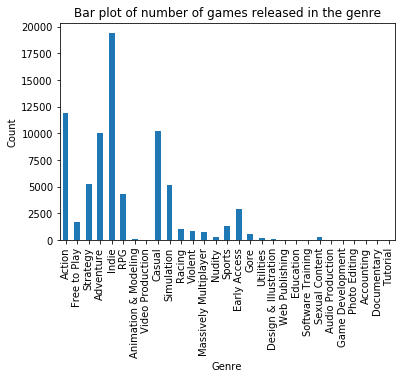

In [21]:
genre_count.plot.bar()
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Bar plot of number of games released in the genre')

As seen from the results above, there are some genres that are low in numbers. This means that we can drop the some genres, and choose to work with only the top genres, which will not affect any further analysis. For this notebook, we will choose the top genres as seen above, and the current steam genre recommendations on the steam page. This includes `Action`, `Adventure`, `Casual`, `Indie`, `Massive Multiplayer`, `Racing`, `RPG`, `Simulation`, `Sports`, and `Strategy`.

In [22]:
# name of the top genres that will be the columns containing binary values
# based on top genre results above and steam page recommended genres
top_cols = ['Action','Adventure','Casual','Indie','Massively Multiplayer','Racing', 'RPG','Simulation','Sports','Strategy']
top_names = []

# append column to steam_df and determine if value is 0 or 1 based on genres column
for col in sorted(top_cols):
    col_name = col.lower().replace('&', 'and').replace(' ', '_')
    top_names.append(col_name)
    steam_df[col_name] = steam_df['genres'].apply(lambda x: 1 if col in x.split(';') else 0)

After running the code above, it creates new columns representing each of the top genres into the steam_df. Each genre is represented with either 0 or 1. 0 if the game does not contain the genre, and 1 if it does.

In [23]:
# check steam_df for the new columns
steam_df

,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,...,action,adventure,casual,indie,massively_multiplayer,rpg,racing,simulation,sports,strategy
appid,,,,,,,,,,,,,,,,,,,,,
10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,...,1,0,0,0,0,0,0,0,0,0
20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,...,1,0,0,0,0,0,0,0,0,0
30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,...,1,0,0,0,0,0,0,0,0,0
40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,...,1,0,0,0,0,0,0,0,0,0
50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,...,1,0,0,0,0,0,0,0,0,0
60,Ricochet,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Valve Anti-Ch...,Action,Action;FPS;Multiplayer,...,1,0,0,0,0,0,0,0,0,0
70,Half-Life,1998-11-08,1,Valve,Valve,windows;mac;linux,0,Single-player;Multi-player;Online Multi-Player...,Action,FPS;Classic;Action,...,1,0,0,0,0,0,0,0,0,0
80,Counter-Strike: Condition Zero,2004-03-01,1,Valve,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,Action;FPS;Multiplayer,...,1,0,0,0,0,0,0,0,0,0
130,Half-Life: Blue Shift,2001-06-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player,Action,FPS;Action;Sci-fi,...,1,0,0,0,0,0,0,0,0,0


In [24]:
steam_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27075 entries, 10 to 1069460
Data columns (total 27 columns):
name                     27075 non-null object
release_date             27075 non-null object
english                  27075 non-null int64
developer                27075 non-null object
publisher                27075 non-null object
platforms                27075 non-null object
required_age             27075 non-null int64
categories               27075 non-null object
genres                   27075 non-null object
steamspy_tags            27075 non-null object
achievements             27075 non-null int64
positive_ratings         27075 non-null int64
negative_ratings         27075 non-null int64
average_playtime         27075 non-null int64
median_playtime          27075 non-null int64
owners                   27075 non-null object
price                    27075 non-null float64
action                   27075 non-null int64
adventure                27075 non-null int64
cas

With the genres extracted and separated, it is now easier to work with the data.

The next column that can be altered is the `owners` column. If we look at the `owners` values now, it contains a String that represents the range of the users. We can use these values but to explore the data easier without affecting its accuracy we can change it to actual numbers. For this, we can get the middle value of this range to represent the number of owners. For example, one game has `1000-2000` owners, we can replace it with `1500`.

In [25]:
steam_df['owners'] = steam_df['owners'].str.split('-').apply(lambda x: (int(x[0]) + int(x[1])) / 2).astype(int)
steam_df['owners']

appid
10          15000000
20           7500000
30           7500000
40           7500000
50           7500000
60           7500000
70           7500000
80          15000000
130          7500000
220         15000000
240         15000000
280          3500000
300          7500000
320         15000000
340         15000000
360          7500000
380          7500000
400         15000000
420          7500000
440         35000000
500          7500000
550         15000000
570        150000000
620         15000000
630          3500000
730         75000000
1002           35000
1200          750000
1250         3500000
1300          150000
             ...    
1059090        10000
1059190        10000
1059280        10000
1059500        10000
1059710        10000
1060030        10000
1060110        10000
1060170        10000
1060300        10000
1060440        10000
1060770        10000
1060870        10000
1061230        10000
1061470        10000
1062120        10000
1062240        10000
1062670

The code above gets the minimum and maximum of a specific range for the number of owners, adds them together then divides by 2. The values will then replace the owners column, making it easier to work with.

## 2.2 Visualizations

Now that we altered the `genres` column into columns that we can easily work with, let's revisualize the number of games in the genres.

Text(0, 0.5, 'Genres')

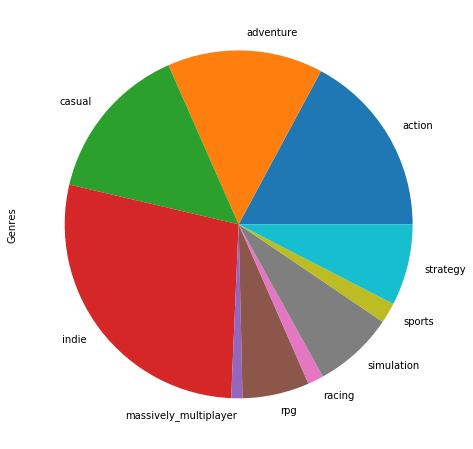

In [26]:
# Get genres columns then sum count
genres = steam_df.columns[17:]
genres_count = steam_df[genres].sum()

#get percentage of each genre based on total number of genres
percent_of_genres = (genres_count/genres_count.sum())*100
percent_of_genres.plot.pie(figsize=(8, 8))
plt.ylabel('Genres')


The pie above shows the distribution of games on different genres. If we compare it to the graph before cleaning the `genres` column, the differences on the percentage of genres can be seen more clearly than before. `Indie` games is still the most frequent genre.

Using the dataset, we can also visualize the average ratings of games per `top genre`.

In [27]:
#get total ratings per genre
total_positive = []
total_negative = []

#sum ratings per genre
for genre in genres:
    total_positive.append(steam_df[steam_df[genre] == 1]['positive_ratings'].sum())
    total_negative.append(steam_df[steam_df[genre] == 1]['negative_ratings'].sum())

#convert to pandas Series
total_positive = pd.Series(index=genres, data=total_positive)
total_negative = pd.Series(index=genres, data=total_negative)

#Create dataFrame
ratings_per_genre = pd.concat([total_positive, total_negative], axis=1)
ratings_per_genre.rename(columns={0: 'positive', 1: 'negative'})

,positive,negative
action,18829730,4246544
adventure,8725072,2337965
casual,2796580,497498
indie,10490685,1774568
massively_multiplayer,2507445,1362196
rpg,5805093,1200125
racing,679716,141861
simulation,4257312,864892
sports,686749,179981
strategy,4533369,945578


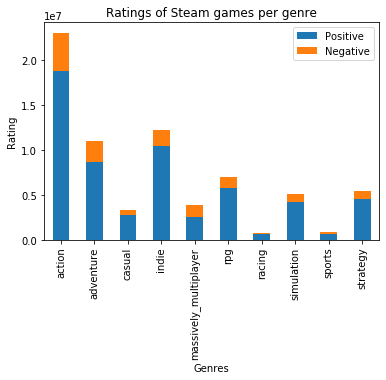

In [28]:
#Visualize using a stacked bar plot
ratings_per_genre.plot(kind='bar', stacked=True)
plt.ylabel('Rating')
plt.xlabel('Genres')
plt.title('Ratings of Steam games per genre')
plt.legend(['Positive', 'Negative'])

The bar plot above shows that in all of the `top genres`, most ratings in every genre are positive.

To visualize the consistency of ratings per each `genre`, we can also average the positive ratings to see if every genre is consistently rated positively.

In [29]:
#get total ratings per game
steam_df['total_ratings'] = steam_df['positive_ratings'] + steam_df['negative_ratings']

#ratio of ratings
steam_df['rating_ratio'] = steam_df['positive_ratings']/steam_df['total_ratings']

#get the average of ratings per genre
avg_rating_ratio_per_genre = []
for genre in genres:
    avg_rating_ratio_per_genre.append((steam_df[steam_df[genre] == 1]['rating_ratio'].sum() / steam_df[genre].sum())*100)

#convert average ratings to Series
avg_rating_ratio_per_genre = pd.Series(index=genres, data=avg_rating_ratio_per_genre)
avg_rating_ratio_per_genre

action                   70.988826
adventure                71.375304
casual                   71.066363
indie                    72.145829
massively_multiplayer    61.189327
rpg                      71.626058
racing                   66.719598
simulation               65.983492
sports                   66.604025
strategy                 69.291369
dtype: float64

Text(0.5, 0, 'Genres')

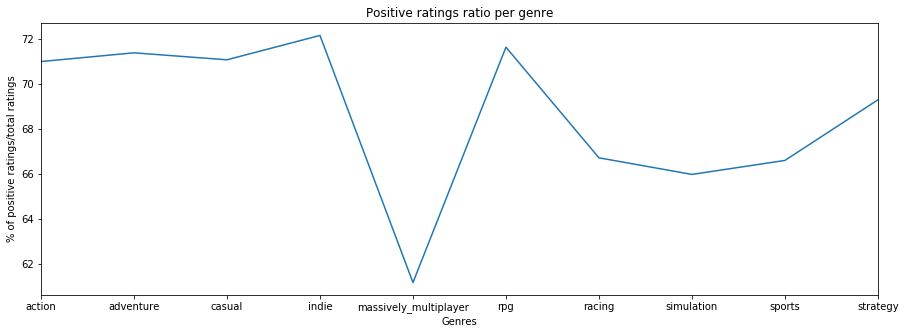

In [30]:
avg_rating_ratio_per_genre.plot(figsize=(15, 5))
plt.title('Positive ratings ratio per genre')
plt.ylabel('% of positive ratings/total ratings')
plt.xlabel('Genres')

The visualization above shows that each `top genres` are consistently rated positively above `50%`. The ratings ranges from `61%-73%`. Even though there was a drop in the `massively_multiplayer` genre, it is still above `50%` positive rating.

## Recommender System

Recommender systems are in use in multiple industries. For example, movie streaming services like Netflix use a kind of recommender system that suggests shows based on the user's preferences and other users with the same interests. Online stores like Amazon suggest other items that are purchased together with the items that the user has purchased. It is no surprise that video game distribution services like Steam also use a recommender system. For this study, we will be devising our own recommender system.

Games are classified according to genre. Games can belong to more than one genre. As described above, the genres that we will use will be the top ten video game genres.

The recommender system used in this study is content-based, which recommends items based on the user's preferences and history, and items similar to it, which in this case, are games the user has played.

### Ratings

On Steam, games are rated as either positive or negative, so a 1-to-5 rating system cannot apply here. To represent this rating system as a normalized rating scale, negative ratings are valued at `-1` while positive ratings are valued at `1`. Unrated and unplayed games will be given a rating of `0`. Unplayed games will be given a special value :

$
  R_{i_\textrm{rating}} =
  \begin{cases}
     -1.0 & \textrm{if game is given a negative rating} \\
      0.0 & \textrm{if game is unrated} \\
      1.0 & \textrm{if game is given a positive rating}
  \end{cases}
$

### Playtime

Steam records the amount of time, in hours, that a user has spent on the game. Although it only tracks the time that the game is open rather than the time that the user may have actually spent playing the game, we assume that such times are representative of actual playtime for the purposes of this recommender system. It is more logical that a user who doesn't like the game not to buy it let alone run and play it. This shall play a factor in the recommender system.

Each game has a median playtime in hours. This means that 50% of the players have spent a total of at least this amount of time. It also means that the other 50% have spent a total of no more than this amount of time. To factor in the recommender system, games that have been played for more than this median playtime will receive an additional `0.5` rating. The median playtime for game $i$ shall be known in the formula as $M_{i_\textrm{total}}$ and the total playtime for a user shall be $T_{i_\textrm{total}}$.

Steam allows for refunds on games that have been played for less than two hours and owned for less than two weeks. Reasons are most likely the user mistakenly bought the game or got bored in the first few minutes of gameplay. Games that have been played for less than two hours will receive a `-0.5` deduction in the rating.

$
  R_{i_\textrm{total}} =
  \begin{cases}
      0.0 & \textrm{if $T_{i_\textrm{total}} < 2 \textrm{ hours}$} \\
      \frac{T_{i_\textrm{total}}}{M_{i_\textrm{total}}}*0.5 & \textrm{if $T_{i_\textrm{total}} \ge 2 \textrm{ hours}$ and $T_{i_\textrm{total}} < M_{i_\textrm{total}}$} \\
      0.5 & \textrm{if $T_{i_\textrm{total}} \ge M_{i_\textrm{total}}$}
  \end{cases}
$

Each Steam profile displays the amount of time that a game has been played for two weeks. Since it is tricky to track playtime across a two-week period and tracking is not in the scope of this study, values will be manually entered to test the recommender system. Two different games can be played simultaneously, so the sum of all the playtimes can exceed 336 hours or 14 days, but the playtime of a single game cannot exceed this value.

To compute this factor, we add all the playtimes for the past 14 days:

$T_\textrm{recent} = \Sigma[T_{i_\textrm{recent}}]$

We get the rating of each game by dividing the playtime by $T_\textrm{recent}$ and normalizing it to the interval $[0.0,1.0]$:

$R_{i_\textrm{recent}} = \frac{T_{i_\textrm{recent}}}{T_\textrm{recent}}$

However, if $T_\textrm{recent}$ is zero, all games will receive a $R_{i_\textrm{recent}}$ of 0 to prevent division-by-zero issues.

The total rating that will be used in the recommender system is computed as:

$R_i = R_{i_\textrm{rating}} + R_{i_\textrm{total}} + R_{i_\textrm{recent}}$

In [31]:
# Create user profile

from game import Game
from user_profile import UserProfile
    
user = [
    Game(271590, -1, 20, 0), # Grand Theft Auto V
    Game(72850, 1, 1000, 0), # Skyrim
    Game(550, 1, 500, 2), # Left 4 Dead 2
    Game(750920, 1, 200, 4), # Shadow of the Tomb Raider
    Game(264710, 0, 100, 0), # Subnautica
    Game(413150, 1, 600, 0) # Stardew Valley
]

# Translate it into a table

profile = UserProfile(steam_tag_df, steam_df)
profile.add_game(Game(271590, -1, 20, 0)) # Grand Theft Auto V
profile.add_game(Game(72850, 1, 1000, 0)) # Skyrim
profile.add_game(Game(550, 1, 500, 2))    # Left 4 Dead 2
profile.add_game(Game(750920, 1, 200, 4)) # Shadow of the Tomb Raider
profile.add_game(Game(264710, 0, 100, 0)) # Subnautica
profile.add_game(Game(413150, 1, 600, 0)) # Stardew Valley

profile.build_profile()

profile.recommend()[1]

C:\Users\Ronell Roxas\Desktop\CSMODEL\git\csmodel\user_profile.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.names_df['rating'] = float('nan')
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,0,name
appid,,
527700,0.268917,Containment Initiative
908830,0.268133,Shadow Fear™ Path to Insanity
259870,0.267295,OMG Zombies!
534440,0.244113,Killing Zombies
792680,0.243600,Containment Initiative: PC Standalone
434070,0.241184,Plight of the Zombie
1250,0.239409,Killing Floor
685390,0.233364,Pain Train PainPocalypse
39800,0.229760,Nation Red


## What is the most played genre based on playtime?

Using the dataset, we can find out what the most played genre is with the highest rating. For this part, there are 2 available columns in the dataset, the `average_playtime` and the `median_playtime`. Choosing `average_playtime`, there is a possiblity that a game's average playtime is skewed because some owners had really long hours compared to other players. This means that the owner is an outlier in computing the average playtime. Using the `median_playtime` is safe, and is not extremely affected by any outliers.

In choosing between `average_playtime` and `median_playtime`, though `average_playtime` considers owners that are outliers, these users can be considered significant because it shows how the game is replayable, alive, and worth the time to 'grind' on. So the `average_playtime` column will be used.

First, we check the `average_playtime` column.

In [32]:
steam_df[steam_df['average_playtime'] == 0]

,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,...,casual,indie,massively_multiplayer,rpg,racing,simulation,sports,strategy,total_ratings,rating_ratio
appid,,,,,,,,,,,,,,,,,,,,,
1002,Rag Doll Kung Fu,2005-10-12,1,Mark Healey,Mark Healey,windows,0,Single-player;Multi-player,Indie,Indie;Fighting;Multiplayer,...,0,1,0,0,0,0,0,0,57,0.701754
1300,SiN Episodes: Emergence,2006-05-10,1,Ritual Entertainment,Ritual Entertainment,windows,0,Single-player;Stats,Action,Action;FPS;Cyberpunk,...,0,0,0,0,0,0,0,0,529,0.884688
1600,Dangerous Waters,2006-02-07,1,Sonalysts,Strategy First,windows,0,Single-player;Multi-player,Strategy,Strategy;Simulation;Naval,...,0,0,0,0,0,0,0,1,184,0.760870
1610,Space Empires IV Deluxe,2006-02-07,1,Malfador Machinations,Strategy First,windows,0,Single-player;Multi-player,Strategy,Strategy;4X;Sci-fi,...,0,0,0,0,0,0,0,1,138,0.811594
1630,Disciples II: Rise of the Elves,2006-07-06,1,Strategy First,Strategy First,windows,0,Single-player;Multi-player;Co-op,Strategy,Strategy;Turn-Based Strategy;Fantasy,...,0,0,0,0,0,0,0,1,559,0.806798
1670,Iron Warriors: T - 72 Tank Command,2006-07-26,1,Strategy First,Strategy First,windows,0,Single-player;Multi-player,Strategy,Simulation;Strategy;Tanks,...,0,0,0,0,0,0,0,1,239,0.573222
2350,QUAKE III: Team Arena,2007-08-03,1,id Software,id Software,windows,0,Single-player;Multi-player;Steam Cloud,Action,Action;FPS;Competitive,...,0,0,0,0,0,0,0,0,139,0.776978
2370,HeXen: Deathkings of the Dark Citadel,2007-08-03,1,Raven Software,id Software,windows,0,Single-player;Steam Cloud,Action,Action;FPS;Classic,...,0,0,0,0,0,0,0,0,77,0.740260
2390,Heretic: Shadow of the Serpent Riders,2007-08-03,1,Raven Software,id Software,windows,0,Single-player;Multi-player;Steam Cloud,Action,Classic;Action;FPS,...,0,0,0,0,0,0,0,0,446,0.934978


As seen above, there are 20905 rows that contain 0 `average_playtime`. We can drop these columns since they will not count towards the highest playtime anyways.

In [33]:
#remove 0 playtime
steam_df = steam_df[steam_df['average_playtime'] > 0.0]

Next, we group the totals by genre.

In [34]:
playtime_per_genre = []

for genre in genres:
    playtime_per_genre.append(steam_df[steam_df[genre] == 1]['average_playtime'].sum())

playtime_per_genre = pd.Series(index=genres, data=playtime_per_genre)
playtime_per_genre

action                   1714230
adventure                1521420
casual                    868603
indie                    2191390
massively_multiplayer     524525
rpg                      1194086
racing                    145634
simulation                801127
sports                    152715
strategy                 1013354
dtype: int64

Text(0.5, 0, 'Genres')

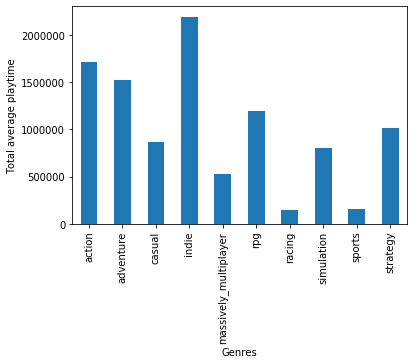

In [36]:
playtime_per_genre.plot(kind='bar')
plt.ylabel('Total average playtime')
plt.xlabel('Genres')

The bar plot above shows that the most played genre is the `Indie` genre. Following it is `Action` and `Adventure`. One reason as to why `Indie` is the most played is because it is also the most number of games in the Steam Games store. Looking back earlier, we found out that `Indie` has the most numbers of games in the genre.

## Insights and Conclusion
The Steam Games dataset contains plenty of entries or data to perform data analysis with. The dataset is recent and it contains plenty of columns that allows a variety of analysis. The dataset also uses the official API for steam, which allows the dataset to be extended or concatenated with other SteamSpy datasets. 


Using the Steam Store games dataset merged with the steam tags dataset, our team was able to create a content-based recommender system. A content-based recommender system is extremely important for vendors like steam. This allows the company to earn more money through recommendations based on a user's preferences. 

Our team was also able to learn which is the highest rated genre, and the most played genre. The dataset contained enough data to answer the questions. `Indie` was the highest rated genre, and the most played genre. `Indie` is also the genre that contains the most number of games. It may seem like `Indie` being the most played genre is highly correlated to it being a genre that contains the most games, but since it is the highest rated genre as well, ratio-wise, it proves that it really does have good hours in every owner's library.